In [1]:
#all my fave imports in case I need them later
import numpy as np
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore') #living dangerously

### Problem 4A.)

The data given for the problem is displayed below:

In [2]:
#[3-5-AMP Conc (mM),overall Rate (microM/hr),95% confidence estimate of measured rate]
data= np.matrix([[0,3.003,0.59],    
                 [0.055,6.302,1.20],
                 [0.093,29.761,5.7],
                 [0.181,52.002,10.2],
                 [0.405,60.306,11.8],
                 [0.990,68.653,13.3]])



#given constants
F6P=100 #microM
ATP=2300 #microM
PFK_E1= 0.12 #microM
KF6P=110 #microM
KATP=420 #microM
kcat=1440 #1/hr

r1=kcat*PFK_E1*(F6P/(KF6P+F6P))*(ATP/(KATP+ATP))
print(r1) # in microM/hr

69.5798319327731


Remembering our previously defined functions for $rate= \frac{W_1+W_2 f_I}{1+W_1+W_2 f_I}r_1$, where $f_I=\frac{(x/K_i)^n}{1+(x/K_i)^n}$

In the case where 3-5-AMP concentration is equal to zero (first row of data), $f_I=0$ and the rate can be expressed as:

$3.003 \mu M/hr= \frac{W_1}{1+W_1}(69.58 \mu M/hr)$

Thus, $W_1=0.0451$.

In the other case of saturation (last row of data), $f_I=1$, and the following expression is obtained.  It is apparent that the system is saturated as $r_1 \approx r$ at this point.

$68.653 \mu M/hr= \frac{0.0451+W_2}{1+0.0451+W_2}(69.58 \mu M/hr) $

Thus, $W_2=74.0$.

### Problem 4B.)

Now, we look to fit the parameters K and n to the data set.  

### Problem 4C.)

Now, with the previously determined model parameters, the experimental data is plotted on the same graph as the model.  LSQ was used to determine parameters n and K and is shown in `problem4 LSQ and other fitting.xlsx`.  

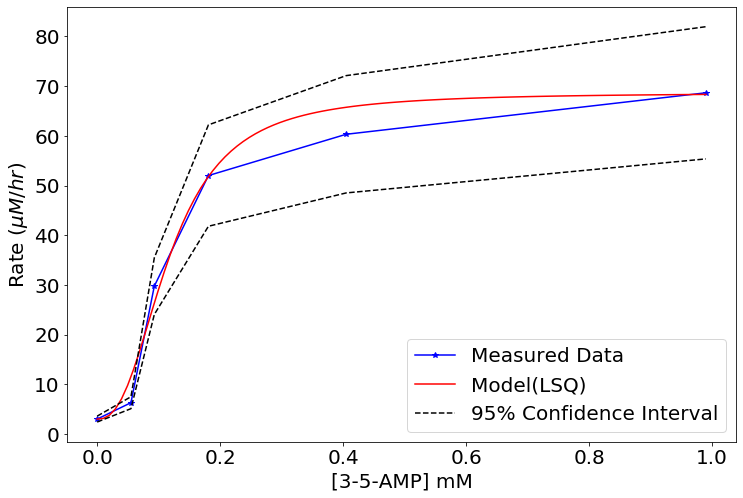

In [3]:
AMP=data[:,0]
rateMeasured=data[:,1]
error=data[:,2]
upperError=np.add(rateMeasured,error)
lowerError=np.subtract(rateMeasured,error)

#model parameters
K1=0.657178  #found on excel file
n1=2.4897589
W1=0.0451
W2=74.0

#LSQ model
AMPtight=np.linspace(0,np.amax(AMP),101)
fI=np.power((AMPtight/K1),n1)/(1+np.power((AMPtight/K1),n1))
rateModel=r1*((W1+W2*fI)/(1+W1+W2*fI))

#plotting
plt.rcParams["figure.figsize"] = (12,8) 
plt.rcParams.update({'font.size': 20})
plt.plot(AMP,rateMeasured,'b*-',label='Measured Data');
plt.plot(AMPtight,rateModel,'r-',label='Model(LSQ)')
plt.plot(AMP,upperError,'k--',label='95% Confidence Interval')
plt.plot(AMP,lowerError,'k--')


plt.xlabel('[3-5-AMP] mM');
plt.ylabel('Rate ($\mu M/hr$)');
plt.legend(loc='best');
plt.show()

The model is reasonably good on this data, as we can see it predominantly falls well within the 95% confidence bound.  However, the model does move reasonably far out of the confidence bound around the second data point.  As the model was produced using standard LSQ fitting, it does not take into account the confidence values for each rate.  An alternative fitting method is used below where the square error is normalized by the 95% confidence bound.  This effectively makes there be a 'higher price for deviations from the model where the confidence interval is tighter.  This yielded:

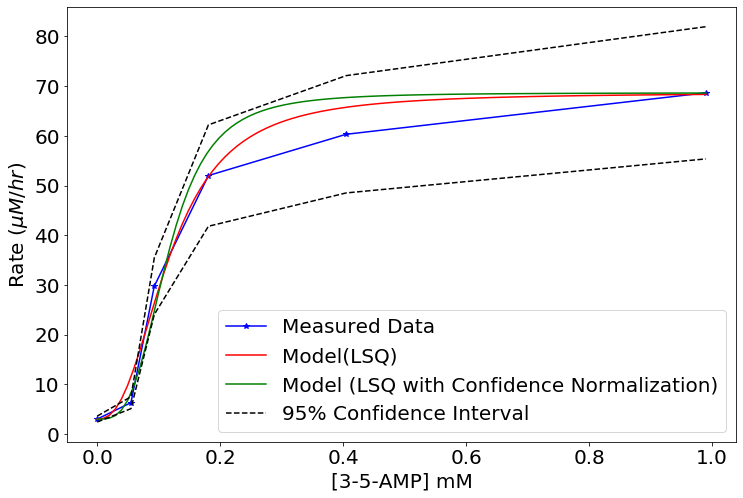

In [4]:
K2=0.4125699
n2=3.339545
fI2=np.power((AMPtight/K2),n2)/(1+np.power((AMPtight/K2),n2))
rateModel2=r1*((W1+W2*fI2)/(1+W1+W2*fI2))

plt.plot(AMP,rateMeasured,'b*-',label='Measured Data');
plt.plot(AMPtight,rateModel,'r-',label='Model(LSQ)')
plt.plot(AMPtight,rateModel2,'g-',label='Model (LSQ with Confidence Normalization)')
plt.plot(AMP,upperError,'k--',label='95% Confidence Interval')
plt.plot(AMP,lowerError,'k--')

plt.xlabel('[3-5-AMP] mM');
plt.ylabel('Rate ($\mu M/hr$)');
plt.legend(loc='best');
plt.show()

We can see that this change to our LSQ fitting resulted in better fit at low 3-5-AMP concentration (where the confidence bound was tighter.  Other fitting techniques could be employed as well to play with the model to best match the data.  